# ANÁLISIS DE LA RENTABILIDAD Y RIESGO DE UNA CARTERA DE DOS ACTIVOS

En el mundo de las finanzas, la rentabilidad de una cartera y su variación en función del coeficiente de correlación entre activos son temas esenciales.

En este caso, por simplicidad, nos centraremos en carteras compuestas por dos activos.

Los tres casos que estudiaremos:

* Cuando $ \rho_{12} = 1$, lo que implica una correlación positiva perfecta.

* Cuando $ \rho_{12} = -1$, lo que implica una correlación negativa perfecta.

* Cuando $ -1 \leq \rho_{12} \leq 1$, lo que implica una correlación parcial que puede variar en fuerza.

 También discutiremos la cartera de mínima varianza y la importancia de la diversificación en la gestión de riesgos.

### Rentabilidad y volatilidad de una cartera con dos activos

Si llamamos:

* $w_1$ a la proporción de la inversión en el activo $1$ $\Rightarrow w_2=1-w_1$

* $\tilde R_p$ a la rentabilidad de la cartera $\Rightarrow \tilde R_p=w_1 \tilde R_1 + w_2 \tilde R_2$

* Varianza $\sigma_{P}² = w_1²*\sigma_{1}² + w_2²*\sigma_{2}² + 2 *w_1 *w_2*\rho_{12}*\sigma_{1} *\sigma_{2}$

* Volatilidad $\sigma_{P} = \sqrt{\sigma_{P}²}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cvxpy as cp
import plotly.graph_objects as go

from utils import dibuja_covar

plt.style.use('ggplot')


ModuleNotFoundError: No module named 'cvxpy'

Definimos dos funciones:

* **calc_ret_cartera** una función que, dada una cartera, nos devuelve la rentabilidad esperada

* **calc_var_cartera** una función que, dada una cartera, nos devuelve la varianza de la cartera

* una cartera ejemplo con dos activos: **cartera**

In [5]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

In [6]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [21]:
#definimos una cartera con dos activos
ret1 = 0.2 #retornos esperados del activo 1
ret2 = 0.1 #retornos esperados del activo 2

std1 = 0.25 #volatilidad del activo 1
std2 = 0.15 #volatilidad del activo 2

p1 = 0.4 #peso del activo 1
p2 = 0.6 #peso del activo 2

### CASO 1:  &nbsp;&nbsp;&nbsp;&nbsp;   $\rho_{12} = 1$

* Si $\rho_{12} = 1$ se dice que los activos son **perfectamente positivamente** correlacionados.

    - No hay beneficios de diversificación.

    - La rentabilidad de la cartera es igual a la suma ponderada de las rentabilidades de los activos.
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = w_1 \sigma_1 + w_2 \sigma_2$

Otras fórmulas:

- $cov(\tilde R_1, \tilde R_2) = \sigma(\tilde R_1) \sigma(\tilde R_2)$
    
- $\sigma_P² = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_1 \sigma_2= (w_1\sigma_1 + w_2\sigma_2)²$


In [8]:
# definimos el coeficiente de correlación
coef_corr = 1

In [9]:
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr):.2f} %')

El retorno de la cartera es:14.00 %
La volatilidad de la cartera es:19.00 %


Vamos a ir variando los pesos de los dos activos y ver cómo se comporta la rentabilidad y la volatilidad de la cartera.

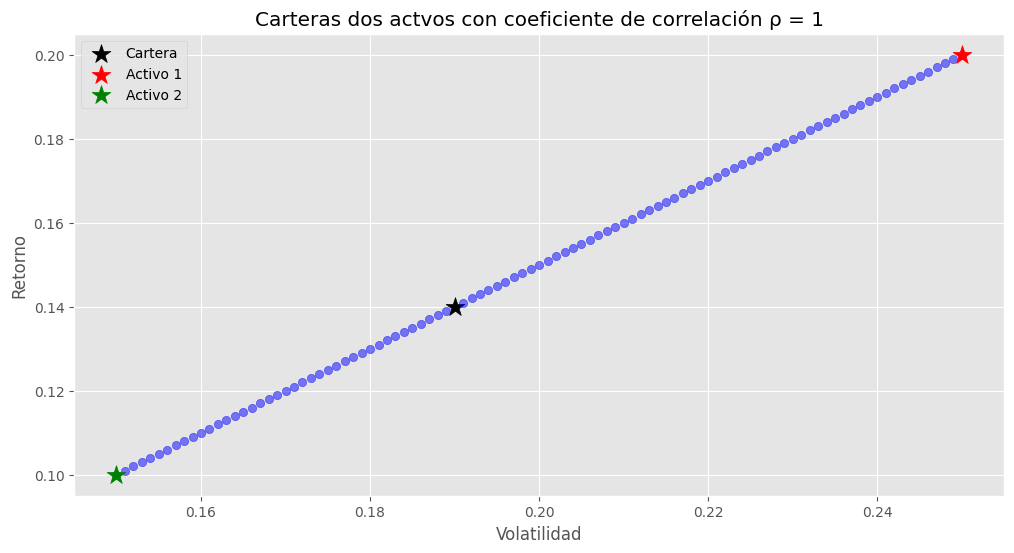

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(0, 1, 101) #generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1

for i in x:
    reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
    stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr) #calculamos la volatilidad de la cartera para cada peso
    if i == p1:
        plt.scatter(stdi, reti, color='black', marker='*', s=200, label='Cartera') #marcamos el punto de la cartera
    else:
        plt.scatter(stdi, reti, color='blue', alpha=0.5) #marcamos el resto de puntos

plt.scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
plt.scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.title('Carteras dos actvos con coeficiente de correlación \u03C1 = 1')
plt.legend()
plt.show()

### CASO 2:  &nbsp;&nbsp;&nbsp;&nbsp;   $\rho_{12} = -1$

* Si $\rho_{12} = -1$ se dice que los activos son **perfectamente pero negativamente** correlacionados.

    - Hay máximos beneficios de diversificación.

    - La rentabilidad de la cartera es igual (recordad que no depenede de las relaccciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = w_1 \sigma_1 - w_2 \sigma_2\ \ \ \ \ \ $    OJO: el resultado debe ser positivo

In [11]:
# definimos el coeficiente de correlación
coef_corr_neg = -1

In [12]:
# calculamos la rentabilidad y volatilidad de la cartera con el nuevo coeficiente de correlación
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %')

El retorno de la cartera es:14.00 %
La volatilidad de la cartera es:1.00 %


Recordad que con $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

y con el $\rho_{12}=-1$ y nos ha dado:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 1$%

Gracias a la **diversificación**, obtenemos la misma rentabilidad pero **menor volatilidad**

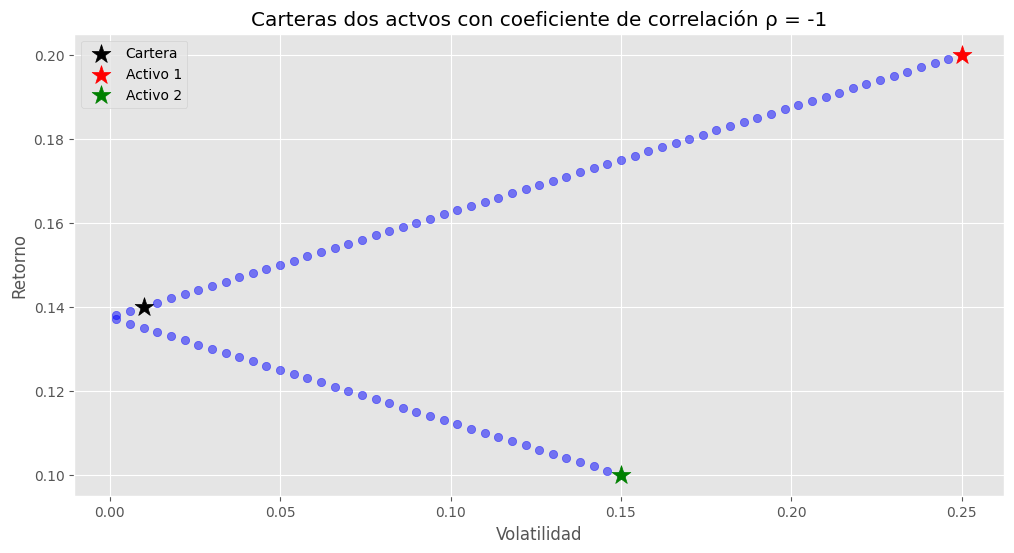

In [13]:
x = np.linspace(0, 1, 101) #generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1

fig, ax = plt.subplots(figsize=(12, 6))

for i in x:
    reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
    stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr_neg) #calculamos la volatilidad de la cartera para cada peso
    if i == p1:
        plt.scatter(stdi, reti, color='black', marker='*', s=200, label='Cartera') #marcamos el punto de la cartera
    else:
        plt.scatter(stdi, reti, color='blue', alpha=0.5) #marcamos el resto de puntos

plt.scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
plt.scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.title('Carteras dos actvos con coeficiente de correlación \u03C1 = -1')
plt.legend()
plt.show()

### CASO 3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    $-1\leq \rho_{12} \leq 1$

* Si $-1 \leq \rho_{12} \leq 1$ se dice que los activos tienen correlación **lineal no perfecta**.

    - Hay beneficios de diversificación, a mayor correlación negativa mayor beneficio.

    - La rentabilidad de la cartera es igual (recordad que no depenede de las relaccciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        
    - La varianza de la cartera es igual a:
        - $\sigma²(\tilde R_p)= \underset{Activo 1} {\underbrace{w_1²\sigma²(\tilde R_1)}}+\underset{Activo 2} {\underbrace{w_2²\sigma²(\tilde R_2)}}+ \underset{Relación entre activos} {\underbrace{2w_1w_2 \rho_{12} \sigma_1 \sigma_2}}$
        $$$$

    - La volatilidad de la cartera es igual a la raiz cuadrada de la varianza.
        - $\sigma(\tilde R_p)= \sqrt{w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2} $

        

In [32]:
x = np.linspace(0, 1, 101)
coef_corr_lst = [-1, -0.8, -0.5, 0, 0.5, 1]

# Definir un mapa de colores basado en coef_corr_lst
#colors = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#f0f921'] # con amarillos
colors = ['#440154', '#3b528b', '#21918c', '#5ec962', '#3366CC', '#FF6633']

# Ajustar el tamaño de la
layout_width = 1200  # Ancho en píxeles
layout_height = 700  # Altura en píxeles

# Crear la figura de plotly
fig = go.Figure()

for idx, coef_corr_i in enumerate(coef_corr_lst):
    ret_lst = []
    std_lst = []

    for i in x:
        reti = calc_ret_cartera(i, 1 - i, ret1, ret2) 
        stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr_i) 

        ret_lst.append(reti)
        std_lst.append(stdi)

    fig.add_trace(go.Scatter(x=std_lst, y=ret_lst, mode='markers', 
                             name=f'Corr {coef_corr_i}', marker=dict(color=colors[idx], size=8, opacity=0.5)))

# Añadir puntos de activos individuales
fig.add_trace(go.Scatter(x=[std1], y=[ret1], mode='markers', marker=dict(color='red', size=20, symbol='star'),
                         name='Activo 1'))
fig.add_trace(go.Scatter(x=[std2], y=[ret2], mode='markers', marker=dict(color='green', size=20, symbol='star'),
                         name='Activo 2'))

# Configurar títulos y etiquetas

title_font_size = 20  # Tamaño de fuente del título

fig.update_layout(title='Cartera de dos activos variando el coeficiente de correlación',
                  font=dict(size=title_font_size),
                  title_x=0.5,
                  #xanchor='center',
                  xaxis_title='Volatilidad',
                  yaxis_title='Retorno',
                  width=layout_width,
                  height=layout_height
                  )

# Mostrar el gráfico
fig.show()


### CARTERA DE MÍNIMA VOLATILIDAD

VAmos a calcular la cartera de mínima varianza:

* Partimos de la fórmula de la varianza de la cartera:

    - $\sigma²(\tilde R_p)= w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2 $
    $$$$

* Calculamos la derivada respecto de $w_1$ y sustituimos $w_2=1-w_1$ e igualamos a 0:

    - $\dfrac{\partial \sigma²(\tilde R_p)}{\partial w_1}= 2w_1\sigma²(\tilde R_1)+2(1-w_1)\sigma²(\tilde R_2)+ 2(1-w_1) \rho_{12} \sigma_1 \sigma_2 = 0$
    $$$$

* Despejamos $w_1$:

    - $w_1 = \dfrac{\sigma_2²-\rho_{12} \sigma_1 \sigma_2}{\sigma_1²+\sigma_2²-2 \rho_{12} \sigma_1 \sigma_2}$
    


  



En el caso de dos activos con correlación $\rho_{12} = -1$:

* $w_1 = \dfrac{\sigma_2²+\sigma_1 \sigma_2}{\sigma_1²+\sigma_2²+2 \sigma_1 \sigma_2} = \dfrac{\sigma_2(\sigma_1+\sigma_2)}{(\sigma_1+\sigma_2)²} = \dfrac{\sigma_2}{\sigma_1+\sigma_2}$

Si lo aplicamos al ejemplo de la cartera con dos activos que hemos estado usando:

In [33]:
p1 = std2/(std1+std2)
p2 = 1 - p1
print(f'El peso del activo 1 es: {100*p1:.2f}%')
print(f'El peso del activo 2 es: {100*p2:.2f}%')


El peso del activo 1 es: 37.50%
El peso del activo 2 es: 62.50%


In [34]:
# calculamos la rentabilidad y volatilidad de la cartera con los nuevos pesos
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %')

El retorno de la cartera es:13.75 %
La volatilidad de la cartera es:0.00 %


**CONCLUSIONES**

Recordad que con los pesos iniciales y $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

Y hemos visto que con $\rho_{12}=-1$ y la fórmula de la cartera de mínima varianza nos ha dado:

* $E(\tilde R_p) = 13.75$%

* $\sigma_p = 0$%

Gracias a la **diversificación**, obtenemos casi la misma rentabilidad pero **sin riesgo**

# DIVERSIFICACIÓN

<center>
    <img src="../imgs/tipos_de_riesgos.PNG"  alt="drawing" width="400">
</center>

#### EFECTO DE LA DIVERSIFICACIÓN EN EL RIESGO DE UNA CARTERA

Vamos a analizar el efecto de la diversificación en el riesgo de una cartera.

En este notebook, por simplicidad, nos centraremos en carteras compuestas por activos con **retornos independientes**  $\Rightarrow \sigma_{i,j} = 0$.

1- Vamos a estudiar las fórmulas de la varianza de una cartera con $N$ activos

2- Vamos a calcular la varianza de una cartera con $N$ activos cuando $N \to \infty$.

3- Vamos a generar retornos independientes de muchos activos usando uns distribución normal

4- Vamos a ir generando carteras cada vez con más activos y ver cómo afecta al riesgo de las carteras. Veremos dos tipos de carteras:

- Cartera equiponderada
- Cartera de mínima varianza



VEAMOS LAS **FÓRMULAS** PARA ENTENDER EL EFECTO DE LA DIVERSIFICACIÓN

Hemos visto la varianza de una cartera de dos activos:

$$\sigma²(\tilde R_p)= w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2 $$


Podemos generalizar para una cartera con $n$ activos:

$$\sigma²(\tilde R_p)= \sum_{i=1}^n w_i² \sigma_i² + \sum_{i=1}^n \sum_{j=1}^n w_i w_j \rho_{ij} \sigma_i \sigma_j $$




Si hacemos una cartera en la que invertimos la misma cantidad en cada activo $\Rightarrow w_i = \dfrac{1}{N}$, la varianza de la cartera se puede escribir como:

$$\sigma_p^2= \dfrac{1}{N^2}\sum_{i=1}^{N} \sigma _i² + \dfrac{1}{N^2}\sum_{i=1}^{N}\sum_{j=1}^{N}\sigma_{ij}$$

Si los **retornos son independientes**, $\sigma_{ij}=0$ y la varianza de la cartera se reduce a:

$$\sigma_p^2= \dfrac{1}{N^2}\sum_{i=1}^{N} \sigma _i²$$

Y cuando el número de activos tiende a infinito:

$$\lim_{N \to \infty} \sigma_p^2= \lim_{N \to \infty} \dfrac{1}{N^2}\sum_{i=1}^{N} \sigma _i² = 0$$

Por lo tanto, la diversificación, cuando los retornos son independientes, eliminan también el riesgo sistemático.

VEAMOS AHORA CON LOS **DATOS**

1- Vamos a ir creando carteras cada vez con más activos y vamos a ver cómo afecta eso a las distintas medidas del riesgo.

2- En una segunda fase, vamos a ordenar los activos de mayor a menor volatilidad para volver a generar las carteras cada vez con más activos para ver como, agrupando de manera "inteligente" podemos mejorar el riesgo.

Para poder comparar, en todos los casos vamos a emplear la **cartera equiponderada y la de menor volatilidad** que se pueda generar con los activos en la cartera.

Las medidas que vamos a emplear son:

* **Volatilidad**
 
* **VaR** 

* **CVaR** 

Genero las medias y volatilidades de los activos usando una distribución normal. 


In [86]:
num_act = 1000 #número de activos
medias = np.random.uniform(0, 0.2, num_act) #generamos dos medias aleatorias entre 0 y 0.2
desv = np.random.uniform(0.1, 0.3, num_act) #generamos dos desviaciones típicas aleatorias entre 0 y 0.3

Genero los retornos con los parámetros anteriores. Para ello uso distribuciones normales. 

NOTA: Los retornos serán independientes entre sí.

In [87]:
retornos = np.random.normal(medias, desv, (500, num_act)) #generamos 100 retornos aleatorios para cada activo

retornos_df = pd.DataFrame(retornos) #convertimos los retornos en un dataframe

Veo las correlaciones entre los retornos y, como son independientes, son todas 0 (o muy pequeñas).

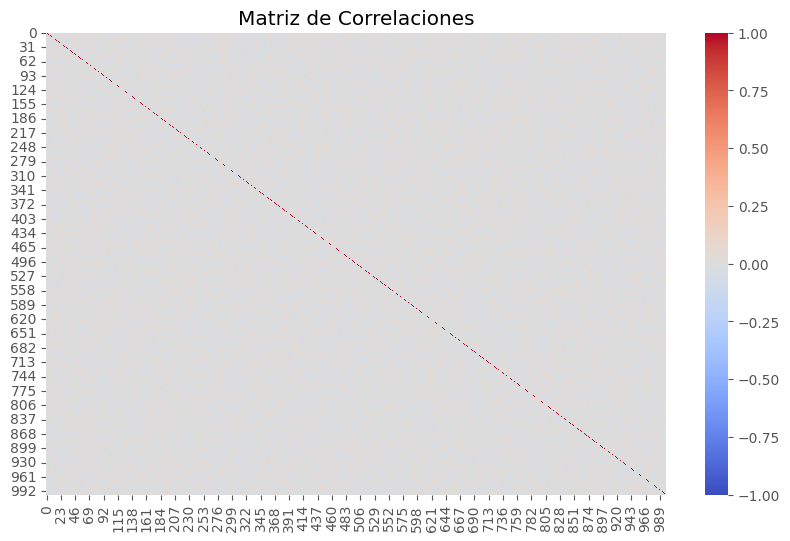

In [75]:
corr_mat = retornos_df.corr()

# Dibujar la matriz de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(corr_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlaciones")
plt.show()

Definimos la función que calcula  devuelve la volatilidad de la cartera equipoonderada.

In [59]:
def volatilidad_cartera_equiponderada(retornos):
    """
    Calcula la volatilidad de una cartera equiponderada basada en los retornos de los activos.

    Parámetros:
    - retornos (numpy array): Una matriz donde cada columna representa los retornos de un activo y cada fila un período de tiempo.

    Retorna:
    - volatilidad (float): La volatilidad de la cartera equiponderada.
    """
    
    # Calcular la matriz de covarianza de los retornos
    matriz_cov = np.cov(retornos, rowvar=False)
    
    # Número de activos en la cartera
    n_days, n_act = retornos.shape    
    # Ponderaciones equiponderadas
    w = np.ones(n_act) / n_act
    
    # Calcular la varianza de la cartera
    varianza_cartera = w.dot(matriz_cov).dot(w.T)
    
    # Calcular la volatilidad de la cartera
    volatilidad = np.sqrt(varianza_cartera)
    
    return volatilidad



Definimos la función que calcula la cartera de menor volatilidad y devuelve la volatilidad de la cartera y los pesos de cada activo.

In [42]:
def calc_port_min_var(retornos):
    '''
    Calcula la cartera de mínima varianza
    retornos: matriz de retornos
    w: pesos de la cartera
    vol_min: volatilidad de la cartera
    '''
    n_days, n_act = retornos.shape
    w = cp.Variable(n_act)
    cov = np.cov(retornos.T)  
    objective = cp.Minimize(w.T @ cov @ w)
    const= [cp.sum(w) == 1, w >= 0]
    prob = cp.Problem(objective, const)
    port_min_var = prob.solve()
    vol_min = np.sqrt(port_min_var)
    return vol_min, w.value

Con los retornos generados, empezamos creando una cartera con dos activos y vamos aumentando el número de activos hasta llegar a num_act.

Para cada cartera calculamos la volatilidad, el VaR y el CVaR.

Hacemos gráficas para ver cómo varían al aumentar el número de activos en la cartera

In [88]:
vol_equi_lst = [] #lista de volatilidades mínimas

ret_cart_equi_lst = [] #lista de retornos de la cartera de mínima varianza
var_95_equi_lst = [] #lista de VaR al 95%
cvar_95_equi_lst = [] #lista de CVaR al 95%

# Calculamos la cartera de mínima varianza para cada número de activos
for i in range(num_act-2):

    tmp_data = retornos_df.iloc[:, :i+2] #seleccionamos los retornos de los i+2 primeros activos

    vol_equi = volatilidad_cartera_equiponderada(tmp_data) #calculamos la cartera de mínima varianza

    vol_equi_lst.append(vol_equi) #añadimos la volatilidad de la cartera de mínima varianza a la lista
    
    pesos = np.ones(i+2)/(i+2) #calculamos los pesos de la cartera equiponderada

    tmp_cart = tmp_data @ pesos.T #calculamos los retornos de la cartera de mínima varianza
    ret_cart_equi_lst.append(tmp_cart) #añadimos los retornos de la cartera de mínima varianza a la lista

    var_95_equi = np.percentile(tmp_cart, 5) #calculamos el VaR al 95%
    var_95_equi_lst.append(var_95_equi) #añadimos el VaR al 95% a la lista
    
    cvar_95_equi = np.mean(tmp_cart[tmp_cart <= var_95_equi]) #calculamos el CVaR al 95%
    cvar_95_equi_lst.append(cvar_95_equi) #añadimos el CVaR al 95% a la lista

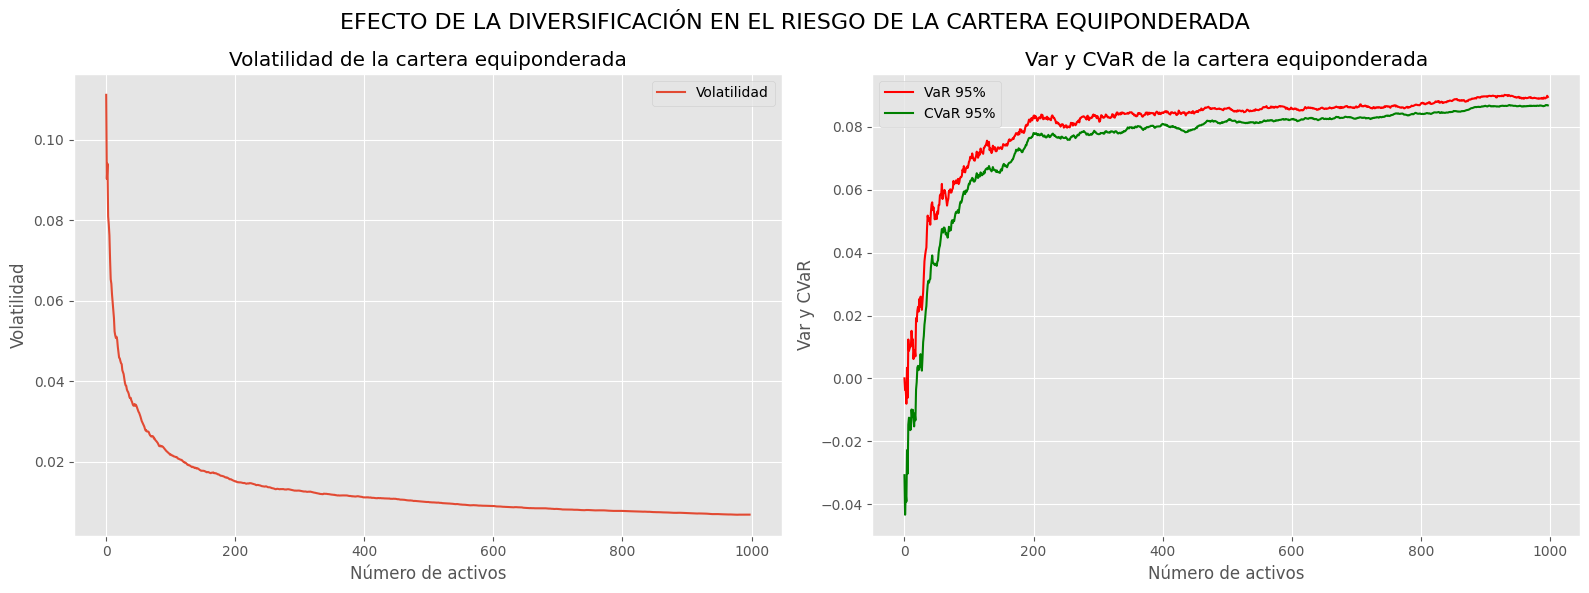

In [93]:
#hacemos la gráfica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica de la izquierda (Volatilidad)
ax1.plot(vol_equi_lst, label='Volatilidad')
ax1.set_xlabel('Número de activos')
ax1.set_ylabel('Volatilidad')
ax1.set_title('Volatilidad de la cartera equiponderada')
ax1.legend()

# Gráfica de la derecha (Otras métricas)
ax2.plot(var_95_equi_lst, label='VaR 95%', color='red')  
ax2.plot(cvar_95_equi_lst, label='CVaR 95%', color='green')
ax2.set_xlabel('Número de activos')
ax2.set_ylabel('Var y CVaR')
ax2.set_title('Var y CVaR de la cartera equiponderada')
ax2.legend()

fig.suptitle('EFECTO DE LA DIVERSIFICACIÓN EN EL RIESGO DE LA CARTERA EQUIPONDERADA', fontsize=16)

plt.tight_layout()  # Asegurar que no haya superposición de las subgráficas
plt.show()

AHORA HACEMOS LO MISMO PERO CON LA CARTERA DE MÍNIMA VOLATILIDAD

In [48]:
var_min_lst = [] #lista de volatilidades mínimas
pesos_lst = [] #lista de pesos de la cartera de mínima varianza
ret_cart_lst = [] #lista de retornos de la cartera de mínima varianza
var_95_lst = [] #lista de VaR al 95%
cvar_95_lst = [] #lista de CVaR al 95%

# Calculamos la cartera de mínima varianza para cada número de activos
for i in range(num_act-2):

    tmp_data = retornos_df.iloc[:, :i+2] #seleccionamos los retornos de los i+2 primeros activos

    var_min, pesos = calc_port_min_var(tmp_data) #calculamos la cartera de mínima varianza

    var_min_lst.append(var_min) #añadimos la volatilidad de la cartera de mínima varianza a la lista
    pesos_lst.append(pesos) #añadimos los pesos de la cartera de mínima varianza a la lista

    tmp_cart = tmp_data @ pesos.T #calculamos los retornos de la cartera de mínima varianza
    ret_cart_lst.append(tmp_cart) #añadimos los retornos de la cartera de mínima varianza a la lista

    var_95 = np.percentile(tmp_cart, 5) #calculamos el VaR al 95%
    var_95_lst.append(var_95) #añadimos el VaR al 95% a la lista
    
    cvar_95 = np.mean(tmp_cart[tmp_cart <= var_95]) #calculamos el CVaR al 95%
    cvar_95_lst.append(cvar_95) #añadimos el CVaR al 95% a la lista


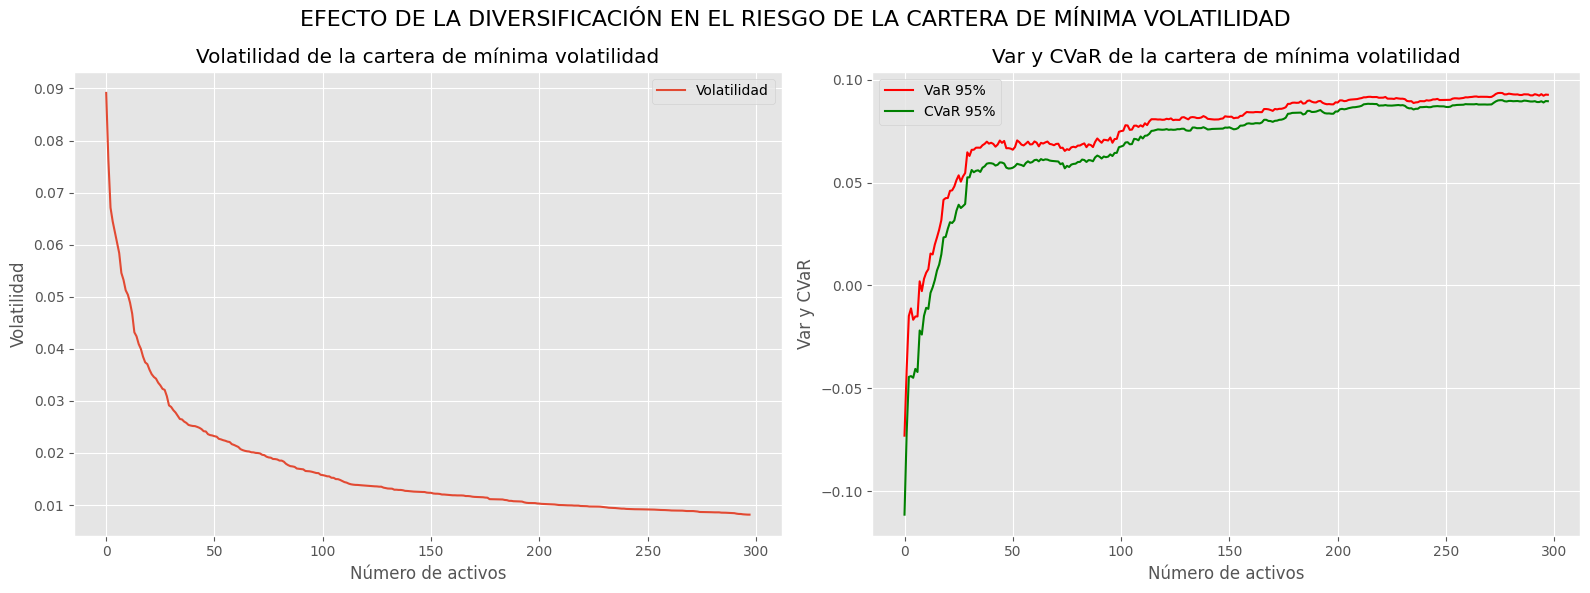

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica de la izquierda (Volatilidad)
ax1.plot(var_min_lst, label='Volatilidad')
ax1.set_xlabel('Número de activos')
ax1.set_ylabel('Volatilidad')
ax1.set_title('Volatilidad de la cartera de mínima volatilidad')
ax1.legend()

# Gráfica de la derecha (Otras métricas)
ax2.plot(var_95_lst, label='VaR 95%', color='red')  
ax2.plot(cvar_95_lst, label='CVaR 95%', color='green')
ax2.set_xlabel('Número de activos')
ax2.set_ylabel('Var y CVaR')
ax2.set_title('Var y CVaR de la cartera de mínima volatilidad')
ax2.legend()

fig.suptitle('EFECTO DE LA DIVERSIFICACIÓN EN EL RIESGO DE LA CARTERA DE MÍNIMA VOLATILIDAD', fontsize=16)

plt.tight_layout()  # Asegurar que no haya superposición de las subgráficas
plt.show()

Veamoa ahora qué efecto tiene, sobre el riesgo de las carteras, el orden en el que se incluyen los activos.

Para ello, ordenamos los activos de mayor a menor volatilidad y volvemos a generar las carteras con los mismos números de activos que antes.

In [53]:
sorted_std = retornos_df.columns[np.argsort(desv)] 
retornos_sort_std_df = retornos_df[sorted_std]

In [54]:
var_min_std_lst = []
pesos_std_lst = []
ret_cart_std_lst = []
var_95_std_lst = []
cvar_95_std_lst = []

for i in range(num_act-2):
    tmp_data_std = retornos_sort_std_df.iloc[:, :i+2]
    var_min_std, pesos_std = calc_port_min_var(tmp_data_std)
    var_min_std_lst.append(var_min_std)
    pesos_std_lst.append(pesos_std)
    tmp_cart_std = tmp_data_std @ pesos_std.T
    ret_cart_lst.append(tmp_cart_std)
    var_95_std = np.percentile(tmp_cart_std, 5)
    var_95_std_lst.append(var_95_std)
    cvar_95_std_lst.append(np.mean(tmp_cart_std[tmp_cart_std <= var_95]))

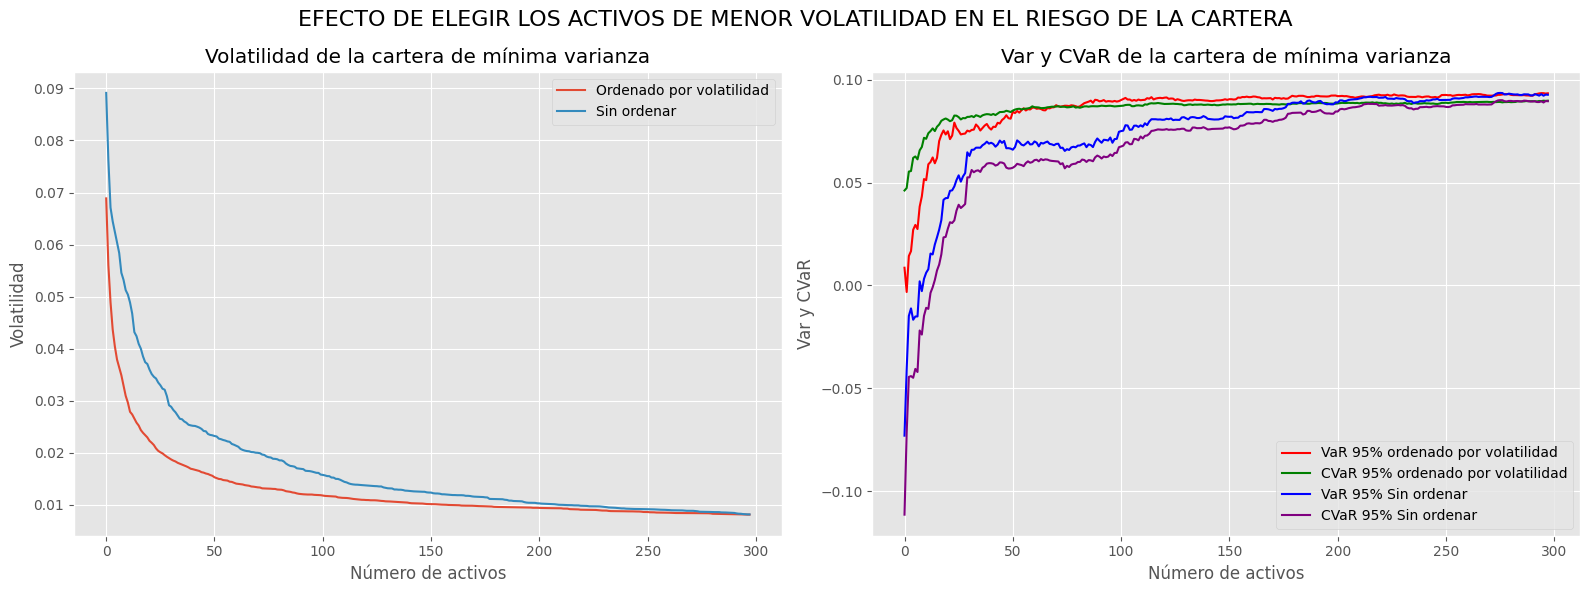

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica de la izquierda (Volatilidad)
ax1.plot(var_min_std_lst, label='Ordenado por volatilidad')
ax1.plot(var_min_lst, label='Sin ordenar')
ax1.set_xlabel('Número de activos')
ax1.set_ylabel('Volatilidad')
ax1.set_title('Volatilidad de la cartera de mínima varianza')
ax1.legend()

# Gráfica de la derecha (Otras métricas)
ax2.plot(var_95_std_lst, label='VaR 95% ordenado por volatilidad', color='red')  
ax2.plot(cvar_95_std_lst, label='CVaR 95% ordenado por volatilidad', color='green')
ax2.plot(var_95_lst, label='VaR 95% Sin ordenar', color='blue')  
ax2.plot(cvar_95_lst, label='CVaR 95% Sin ordenar', color='purple')
ax2.set_xlabel('Número de activos')
ax2.set_ylabel('Var y CVaR')
ax2.set_title('Var y CVaR de la cartera de mínima varianza')
ax2.legend()

fig.suptitle('EFECTO DE ELEGIR LOS ACTIVOS DE MENOR VOLATILIDAD EN EL RIESGO DE LA CARTERA', fontsize=16)

plt.tight_layout()  # Asegurar que no haya superposición de las subgráficas
plt.show()